In [ ]:
#@title Code that will set everything working for that exercise. It's good to have a look on it, though.
%tensorflow_version 2.x

#Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


"""Create and compile a simple linear regression model."""
def build_model(my_learning_rate):
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


"""Feed a dataset into the model in order to train it."""
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history  


"""Plot a curve of loss vs. epoch."""
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

## The dataset

This exercise uses the California Housing dataset to predict the `median_house_value` at the city block level. Like many "famous" datasets, the California Housing Dataset actually consists of two separate datasets, each living in separate .csv files:

* The training set is in `california_housing_train.csv`.
* The test set is in `california_housing_test.csv`.

You'll create the validation set by dividing the downloaded training set into two parts:

* a smaller training set  
* a validation set

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

## Scale the label values

The following code cell scales the `median_house_value`. 
See the 7 & 8 lab notes for details.

In [ ]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

## Task 1: Experiment with the validation split

In the following code cell, you'll see a variable named `validation_split`, which is initialized at 0.2.  The `validation_split` variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a `validation_split` of 0.2 means that:

* 17,000 * 0.2 ~= 3,400 examples will become the validation set.
* 17,000 * 0.8 ~= 13,600 examples will become the new training set.

The following code builds a model, trains it on the training set, and evaluates the built model on both:

* The training set.
* And the validation set.

If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are **not** almost identical. 

Experiment with two or three different values of `validation_split`.  Do different values of `validation_split` fix the problem? 


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 3ms/step - loss: 38311.2891 - root_mean_squared_error: 195.7327 - val_loss: 46445.8555 - val_root_mean_squared_error: 215.5130
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 21840.0781 - root_mean_squared_error: 147.7839 - val_loss: 26943.9629 - val_root_mean_squared_error: 164.1462
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11623.1602 - root_mean_squared_error: 107.8108 - val_loss: 14598.7314 - val_root_mean_squared_error: 120.8252
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7076.5840 - root_mean_squared_error: 84.1224 - val_loss: 9392.1445 - val_root_mean_squared_error: 96.9131
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.9712 - root_mean_squared_error: 80.7092 - val_loss: 9260.1963 - val_root_mean_squared_error: 96.2299
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.4858 - root_mean_squ

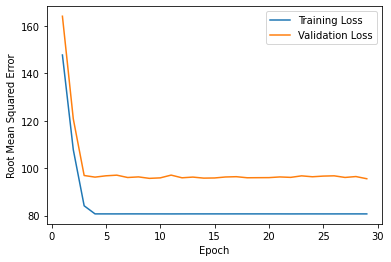

Epoch 1/30
128/128 [==============================] - 1s 3ms/step - loss: 41061.3906 - root_mean_squared_error: 202.6361 - val_loss: 49454.1406 - val_root_mean_squared_error: 222.3829
Epoch 2/30
128/128 [==============================] - 0s 2ms/step - loss: 24816.4160 - root_mean_squared_error: 157.5323 - val_loss: 29756.0781 - val_root_mean_squared_error: 172.4995
Epoch 3/30
128/128 [==============================] - 0s 2ms/step - loss: 13882.0371 - root_mean_squared_error: 117.8221 - val_loss: 16417.3242 - val_root_mean_squared_error: 128.1301
Epoch 4/30
128/128 [==============================] - 0s 2ms/step - loss: 8088.3828 - root_mean_squared_error: 89.9354 - val_loss: 9597.0713 - val_root_mean_squared_error: 97.9646
Epoch 5/30
128/128 [==============================] - 0s 2ms/step - loss: 6654.8945 - root_mean_squared_error: 81.5775 - val_loss: 8446.2148 - val_root_mean_squared_error: 91.9033
Epoch 6/30
128/128 [==============================] - 0s 2ms/step - loss: 6615.3677 - ro

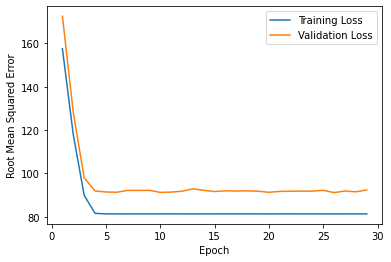

Epoch 1/30
119/119 [==============================] - 1s 2ms/step - loss: 41683.9531 - root_mean_squared_error: 204.1665 - val_loss: 43524.7578 - val_root_mean_squared_error: 208.6259
Epoch 2/30
119/119 [==============================] - 0s 2ms/step - loss: 26082.0684 - root_mean_squared_error: 161.4994 - val_loss: 26876.8242 - val_root_mean_squared_error: 163.9415
Epoch 3/30
119/119 [==============================] - 0s 2ms/step - loss: 15287.1016 - root_mean_squared_error: 123.6410 - val_loss: 15485.9297 - val_root_mean_squared_error: 124.4425
Epoch 4/30
119/119 [==============================] - 0s 2ms/step - loss: 9045.8584 - root_mean_squared_error: 95.1097 - val_loss: 9226.4395 - val_root_mean_squared_error: 96.0544
Epoch 5/30
119/119 [==============================] - 0s 2ms/step - loss: 6903.4321 - root_mean_squared_error: 83.0869 - val_loss: 7655.4697 - val_root_mean_squared_error: 87.4955
Epoch 6/30
119/119 [==============================] - 0s 2ms/step - loss: 6781.3257 - ro

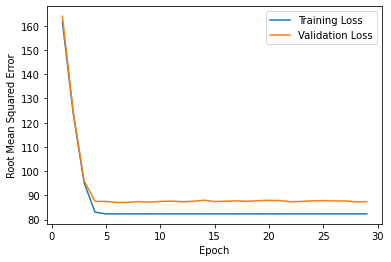

Epoch 1/30
111/111 [==============================] - 1s 3ms/step - loss: 41408.4570 - root_mean_squared_error: 203.4907 - val_loss: 37226.9297 - val_root_mean_squared_error: 192.9428
Epoch 2/30
111/111 [==============================] - 0s 2ms/step - loss: 26728.5078 - root_mean_squared_error: 163.4886 - val_loss: 23265.8320 - val_root_mean_squared_error: 152.5314
Epoch 3/30
111/111 [==============================] - 0s 2ms/step - loss: 16256.9365 - root_mean_squared_error: 127.5027 - val_loss: 13731.3672 - val_root_mean_squared_error: 117.1809
Epoch 4/30
111/111 [==============================] - 0s 2ms/step - loss: 9897.7393 - root_mean_squared_error: 99.4874 - val_loss: 8530.0459 - val_root_mean_squared_error: 92.3582
Epoch 5/30
111/111 [==============================] - 0s 2ms/step - loss: 7287.3267 - root_mean_squared_error: 85.3658 - val_loss: 7108.4375 - val_root_mean_squared_error: 84.3116
Epoch 6/30
111/111 [==============================] - 0s 2ms/step - loss: 6993.8223 - ro

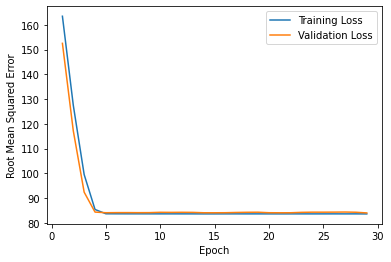

Epoch 1/30
102/102 [==============================] - 1s 3ms/step - loss: 47805.9023 - root_mean_squared_error: 218.6456 - val_loss: 38691.1641 - val_root_mean_squared_error: 196.7007
Epoch 2/30
102/102 [==============================] - 0s 3ms/step - loss: 32668.0371 - root_mean_squared_error: 180.7430 - val_loss: 25631.8398 - val_root_mean_squared_error: 160.0995
Epoch 3/30
102/102 [==============================] - 0s 2ms/step - loss: 21172.9062 - root_mean_squared_error: 145.5091 - val_loss: 16060.6133 - val_root_mean_squared_error: 126.7305
Epoch 4/30
102/102 [==============================] - 0s 2ms/step - loss: 13198.2432 - root_mean_squared_error: 114.8836 - val_loss: 9926.8262 - val_root_mean_squared_error: 99.6335
Epoch 5/30
102/102 [==============================] - 0s 3ms/step - loss: 8685.3486 - root_mean_squared_error: 93.1952 - val_loss: 7146.5312 - val_root_mean_squared_error: 84.5372
Epoch 6/30
102/102 [==============================] - 0s 2ms/step - loss: 7230.3853 - 

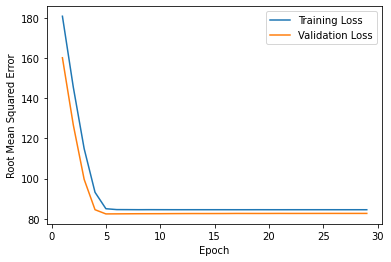

Epoch 1/30
94/94 [==============================] - 1s 3ms/step - loss: 46358.1875 - root_mean_squared_error: 215.3095 - val_loss: 34549.5430 - val_root_mean_squared_error: 185.8751
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 32351.2461 - root_mean_squared_error: 179.8645 - val_loss: 23517.3145 - val_root_mean_squared_error: 153.3536
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 21501.6387 - root_mean_squared_error: 146.6344 - val_loss: 15291.5518 - val_root_mean_squared_error: 123.6590
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 13800.8262 - root_mean_squared_error: 117.4769 - val_loss: 9991.8359 - val_root_mean_squared_error: 99.9592
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 9104.8213 - root_mean_squared_error: 95.4192 - val_loss: 7420.2998 - val_root_mean_squared_error: 86.1412
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 7175.0645 - root_mean_sq

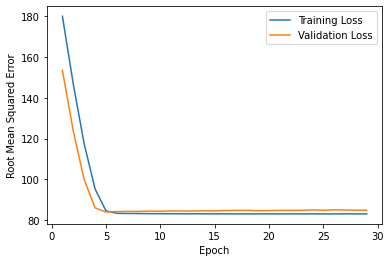

Epoch 1/30
85/85 [==============================] - 1s 3ms/step - loss: 47369.4141 - root_mean_squared_error: 217.6452 - val_loss: 37597.6680 - val_root_mean_squared_error: 193.9012
Epoch 2/30
85/85 [==============================] - 0s 3ms/step - loss: 34409.3359 - root_mean_squared_error: 185.4975 - val_loss: 26683.0996 - val_root_mean_squared_error: 163.3496
Epoch 3/30
85/85 [==============================] - 0s 2ms/step - loss: 24189.2676 - root_mean_squared_error: 155.5290 - val_loss: 18252.4121 - val_root_mean_squared_error: 135.1015
Epoch 4/30
85/85 [==============================] - 0s 2ms/step - loss: 16358.6748 - root_mean_squared_error: 127.9010 - val_loss: 12199.9453 - val_root_mean_squared_error: 110.4534
Epoch 5/30
85/85 [==============================] - 0s 3ms/step - loss: 10919.2354 - root_mean_squared_error: 104.4951 - val_loss: 8571.7207 - val_root_mean_squared_error: 92.5836
Epoch 6/30
85/85 [==============================] - 0s 3ms/step - loss: 7889.3086 - root_mea

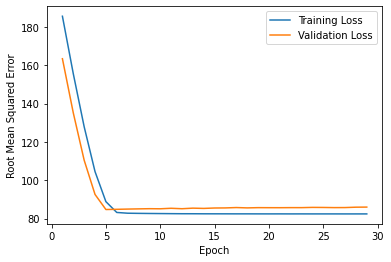

In [ ]:
# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2
while validation_split<=0.5:
  # The following variables are the hyperparameters.
  learning_rate = 0.08
  epochs = 30
  batch_size = 100

  # Identify the feature and the label.
  my_feature="median_income"  # the median income on a specific city block.
  my_label="median_house_value" # the median value of a house on a specific city block.
  # That is, you're going to create a model that predicts house value based 
  # solely on the neighborhood's median income.  

  # Discard any pre-existing version of the model.
  my_model = None

  # Invoke the functions to build and train the model.
  my_model = build_model(learning_rate)
  epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                      my_label, epochs, batch_size, 
                                      validation_split)
  print("Validation split = ",validation_split)
  plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                      history["val_root_mean_squared_error"])
  validation_split=validation_split+0.05

By slightly raising the value of the validation_split variable, it can be observed that, besides some slight deviations, by slightly raising the value of the validation_split variable to 0.35 we can obtain loss curves that are almost identical. The other values are either close to being identical or not at all.

## Task 2: Determine **why** the loss curves differ

Evidently, the data in the training set isn't similar enough to the data in the validation set. Is that possible? Yes, but this problem is actually pretty common in machine learning. 

Your task is to determine **why** the loss curves aren't highly similar. As with most issues in machine learning, the problem is rooted in the data itself. To solve this mystery of why the training set and validation set aren't almost identical, analyze the data making use of pandas:
  * By default, the pandas `head` method outputs the *first* 5-data rows. Try to see more of the training set, specifying the `n` argument to `head` and assign a large positive integer to `n`.

In [ ]:
train_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
5,-114.6,33.6,29.0,1387.0,236.0,671.0,239.0,3.3,74.0
6,-114.6,33.6,25.0,2907.0,680.0,1841.0,633.0,2.7,82.4
7,-114.6,34.8,41.0,812.0,168.0,375.0,158.0,1.7,48.5
8,-114.6,33.6,34.0,4789.0,1175.0,3134.0,1056.0,2.2,58.4
9,-114.6,34.8,46.0,1497.0,309.0,787.0,271.0,2.2,48.1


In [ ]:
train_df.latitude.values[:1000]

array([34.19, 34.4 , 33.69, 33.64, 33.57, 33.63, 33.61, 34.83, 33.61,
       34.83, 33.62, 33.6 , 34.84, 34.83, 32.76, 34.89, 33.6 , 32.79,
       32.74, 33.92, 33.49, 33.43, 34.55, 33.82, 33.54, 32.82, 32.82,
       32.82, 32.81, 32.81, 32.82, 32.81, 32.76, 32.86, 32.7 , 32.99,
       33.19, 32.8 , 32.68, 32.87, 32.69, 32.67, 32.67, 32.75, 32.68,
       32.67, 33.24, 33.12, 32.99, 32.68, 34.22, 33.13, 33.12, 32.98,
       32.97, 32.97, 32.77, 32.73, 32.67, 34.91, 32.99, 32.97, 32.97,
       32.73, 32.99, 32.99, 32.98, 32.97, 32.79, 32.98, 32.98, 32.82,
       32.8 , 32.79, 32.79, 32.78, 32.96, 32.8 , 32.8 , 32.8 , 32.79,
       32.79, 32.78, 32.78, 32.78, 32.76, 32.85, 32.85, 32.84, 32.83,
       32.8 , 32.79, 32.78, 32.78, 33.88, 32.81, 32.81, 32.79, 32.78,
       32.85, 32.79, 32.69, 33.2 , 32.87, 33.04, 33.04, 32.8 , 32.79,
       32.75, 33.36, 33.35, 33.09, 32.8 , 33.26, 33.49, 34.2 , 32.93,
       33.34, 33.36, 35.55, 33.38, 33.28, 33.3 , 33.32, 33.4 , 33.19,
       32.74, 33.51,

In [ ]:
train_df.latitude.values[16000:17000]

array([37.78, 37.78, 37.78, 37.77, 37.77, 37.77, 37.77, 37.77, 37.77,
       37.77, 37.76, 37.76, 37.76, 37.76, 37.76, 37.76, 37.76, 37.75,
       37.75, 37.75, 37.75, 37.75, 37.74, 37.74, 37.74, 37.73, 37.73,
       37.73, 37.73, 37.73, 37.72, 37.72, 37.72, 37.72, 37.72, 37.71,
       37.71, 37.7 , 37.67, 37.66, 37.65, 37.63, 37.52, 40.85, 40.56,
       38.58, 38.51, 38.3 , 38.28, 37.91, 37.81, 37.79, 37.79, 37.79,
       37.79, 37.78, 37.78, 37.78, 37.78, 37.78, 37.78, 37.77, 37.77,
       37.77, 37.77, 37.77, 37.77, 37.77, 37.76, 37.76, 37.76, 37.75,
       37.75, 37.75, 37.74, 37.74, 37.73, 37.73, 37.73, 37.72, 37.72,
       37.72, 37.72, 37.72, 37.71, 37.71, 37.71, 37.71, 37.71, 37.71,
       37.7 , 37.69, 37.67, 37.66, 37.66, 37.63, 37.62, 40.52, 38.53,
       38.29, 37.98, 37.88, 37.79, 37.79, 37.79, 37.78, 37.78, 37.78,
       37.78, 37.78, 37.78, 37.78, 37.78, 37.77, 37.76, 37.76, 37.75,
       37.75, 37.75, 37.75, 37.74, 37.74, 37.74, 37.73, 37.73, 37.73,
       37.73, 37.72,

A. It can be seen clearly that the latitude changes as we go down the dataframe. It is possible that the latitudes seen in validation were never seen in the training set.

## Task 3. Fix the problem

Now that we know what the problem is, try to fix it! You could shuffle the examples in the training set before splitting the examples into a training set and validation set. To do so, take the following steps:

1. Shuffle the data in the training set by adding the following line anywhere before you call `train_model` (in the code cell associated with Task 1):

```
  shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
```                                    

2. Pass `shuffled_train_df` (instead of `train_df`) as the second argument to `train_model` (in the code call associated with Task 1) so that the call becomes as follows:

```
  epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                      my_label, epochs, batch_size, 
                                      validation_split)
```

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


111/111 [==============================] - 1s 3ms/step - loss: 44199.0195 - root_mean_squared_error: 210.2356 - val_loss: 35137.9375 - val_root_mean_squared_error: 187.4512
Epoch 2/30
111/111 [==============================] - 0s 2ms/step - loss: 28727.7754 - root_mean_squared_error: 169.4927 - val_loss: 22034.5156 - val_root_mean_squared_error: 148.4403
Epoch 3/30
111/111 [==============================] - 0s 3ms/step - loss: 17546.5957 - root_mean_squared_error: 132.4636 - val_loss: 13140.3828 - val_root_mean_squared_error: 114.6315
Epoch 4/30
111/111 [==============================] - 0s 2ms/step - loss: 10501.1250 - root_mean_squared_error: 102.4750 - val_loss: 8239.9814 - val_root_mean_squared_error: 90.7743
Epoch 5/30
111/111 [==============================] - 0s 3ms/step - loss: 7418.5063 - root_mean_squared_error: 86.1308 - val_loss: 7008.2427 - val_root_mean_squared_error: 83.7152
Epoch 6/30
111/111 [==============================] - 0s 2ms/step - loss: 7018.8613 - root_mean_s

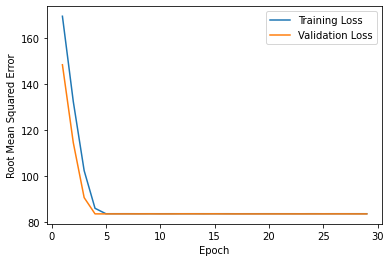

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.35

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# shuffled_train_df = sklearn.utils.shuffle(shuffled_train_df)
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## Task 4: Use the Test Dataset to Evaluate Your Model's Performance

The test set usually acts as the ultimate judge of a model's quality. The test set can serve as an impartial judge because its examples haven't been used in training the model. Run the following code cell to evaluate the model with the test set:

In [ ]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 7012.4346 - root_mean_squared_error: 83.7403


Compare the root mean squared error of the model when evaluated on each of the three datasets:

* training set: look for `root_mean_squared_error` in the final training epoch.
* validation set: look for `val_root_mean_squared_error` in the final training epoch.
* test set: run the preceding code cell and examine the `root_mean_squred_error`.

Ideally, the root mean squared error of all three sets should be similar. Are they?

training set: 83.7784

validation set: 83.6994

test set: 83.7403

After the necessary modifications, we can observe that for every set we reached values that differ by aproximately 0.05. Therefore all values for the root mean squared error are similar.